In [551]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as sts
import warnings
warnings.filterwarnings('ignore')
plt.style.use("seaborn")

# Проверка гипотез

### **Нами были выдвинуты следующие гипотезы:**
1) Квартиры на первом и последнем этажах в среднем дешевле, чем остальные  
2) Цена за квадратный метр квартиры распределена нормально    
3) Квартиры в высотках дороже    
4) В высотках квартиры премиум и бизнес класса     
5) В ЦАО квартиры премиум и бизнес класса     
6) Разброс цен на квартиры не зависит от округа   


## Гипотеза 1 : скидка за 1-ый / последний этаж

Для того чтобы проверить гипотезу о том, что $\mu$ цены квартир на 1-ом/последнем этаже меньше, чем $\mu$ цен остальных квартир, воспользуемсй z-статистикой, так как мы не знаем распределения наших данных и дисперсии. 

In [552]:
#открываем файл с данными без пропусков и с добавленной колонкой с ценой за 1 кв.м
data_without_miss = pd.read_csv('data_without_miss.csv') 

В качестве целевой переменной будем использовать цену за 1 кв.м. для того, чтобы исключить влияние таких существенных признаков, как площадь квартиры, жилая площадь и др. Так как брать **среднее по цене** всех квартир вместе было бы некорректно

Возьмем уровень значимости $\alpha$ = 0.05    
Сформулируем гипотезы:
$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_{1/last} = \mu_{other} \hspace{2mm} \text{(скидки за 1-ый/последний этаж нет)} \\
&H_1: \hspace{2mm} \mu_{1/last} < \mu_{other}  \hspace{2mm} \text{(скидка за 1-ый/последний этаж есть)}
\end{aligned}
$$

                                                    Формула для z-статистики:

$$ z = \frac{\bar{X} - \bar{Y} - \mu_0}         {\sqrt{\frac {\hat{\sigma}_x^2} {n} + \frac {\hat{\sigma}_y^2} {m}}}$$

In [553]:
first_last = data_without_miss[(data_without_miss['Этаж'] == 1) | (data_without_miss['Этаж'] == data_without_miss['Этажей в доме'])]['Цена за 1 кв.м']
other = data_without_miss[(data_without_miss['Этаж'] != 1) & (data_without_miss['Этаж'] != data_without_miss['Этажей в доме'])]['Цена за 1 кв.м']

Найдем $\bar{X}$ по выборке с квартирами на $1/last$ этажах

In [554]:
mean_first_last = first_last.mean()

Найдем $\bar{Y}$ по выборке с квартирами на $other$ этажах

In [555]:
mean_other = other.mean()

Найдем $\hat{\sigma}_x^2$ (несмещенную оценку дисперсии) по выборке с квартирами на $1/last$ этажах

In [556]:
var_first_last = first_last.var(ddof=1)

Найдем $\hat{\sigma}_y^2$ по выборке с квартирами на $other$ этажах

In [557]:
var_other = other.var(ddof=1)

Найдем $n$ и $m$

In [558]:
n = first_last.size
m = other.size

Подставим все найденные значения в формулу и рассчитаем z-статистику 

In [559]:
z_stat = (mean_first_last - mean_other)/np.sqrt(var_first_last/n + var_other/m)
z_crit = - sts.norm.ppf(1-0.05) #alpha = 5%
print('z_stat: ', z_stat)
print('z_crit: ',z_crit)

z_stat:  -4.109739012553561
z_crit:  -1.6448536269514722


In [560]:
if z_stat > z_crit: #т.к. левосторонняя альтернатива
    print('Гипотеза о равенстве мат.ожиданий НЕ отвергается')
else: 
    print('Гипотеза о равенстве мат.ожиданий отвергается')

Гипотеза о равенстве мат.ожиданий отвергается


**Вывод:** мы отвергаем нулевую гипотезу о равенстве мат.ожиданий цен квартир, расположенных на $1/last$ этажах и квартир на $other$ этажах, в пользу альтернативной, которая гласит о том, что **скидка за $1/last$ этаж есть.**

## Гипотеза 2 : цена за 1 кв.м - нормальная случайная величина

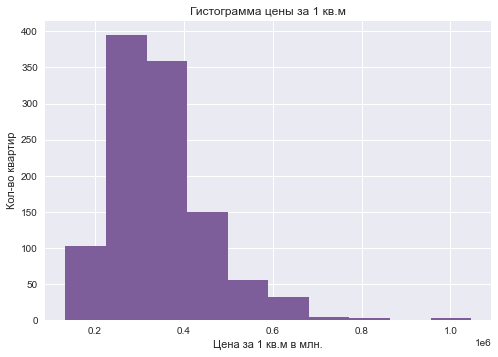

In [561]:
plt.hist(data_without_miss['Цена за 1 кв.м'], color='#7d5e9b')
plt.title('Гистограмма цены за 1 кв.м')
plt.xlabel('Цена за 1 кв.м в млн.')
plt.ylabel('Кол-во квартир');

Визуально гистограмма не похожа на распределение нормальной случайной величины, распределение цены за 1 кв.м в Москве скошено вправо, так как имеет удлиненный правый хвост. Также можно наблюдать выбросы на правом конце гистограммы, можем предположить, что это сверх-дорогие квартиры, в которых цена за 1 кв.м достигает 1 млн.руб.

Проверим гипотезу о нормальности с помощью теста Колмогорова-Смирнова

In [562]:
from scipy.stats import kstest
pv_square_metr = kstest(data_without_miss['Цена за 1 кв.м'], 'norm', args=(data_without_miss['Цена за 1 кв.м'].mean(), data_without_miss['Цена за 1 кв.м'].std(ddof=1))).pvalue
if pv_square_metr > alpha:
    print('Принять гипотезу о нормальности распределения цены за 1 кв.метр')
else:
    print('Отклонить гипотезу о нормальности распределения цены за 1 кв.метр')

Отклонить гипотезу о нормальности распределения цены за 1 кв.метр


**Вывод:** нельзя говорить о том, что распределение цены за 1 кв.м в московской новостройке нормально. 

## Гипотеза 3 : Квартиры в высотках дороже   

Предположим, что в высотках цена за 1 квадратный метр больше (элитные, престижные ЖК, расчитанные на покупателей с высоким заработком и т.д и т.п.), чем в многоэтажных домах. 

Возьмем уровень значимости $\alpha$ = 0.05    
Сформулируем гипотезы:
$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_{high} = \mu_{low} \hspace{2mm} \text{(квартиры в высотных и многоэтажных домах стоят одинаково)} \\
&H_1: \hspace{2mm} \mu_{high} > \mu_{low}  \hspace{2mm} \text{(квартиры в высотных домах дороже)}
\end{aligned}
$$

Пусть высотный дом, это дом в котором >= 25 этажей (именно с такого количества этажей в России принято считать здание высоткой)  
Для проверки гипотезы вновь используем z-статистику:
$$ z = \frac{\bar{X} - \bar{Y} - \mu_0}         {\sqrt{\frac {\hat{\sigma}_x^2} {n} + \frac {\hat{\sigma}_y^2} {m}}}$$

In [563]:
high = data_without_miss[(data_without_miss['Этажей в доме'] >= 25)]['Цена за 1 кв.м']
low = data_without_miss[(data_without_miss['Этажей в доме'] < 25)]['Цена за 1 кв.м']

In [564]:
mean_high = high.mean()
mean_low = low.mean()
var_high = high.var(ddof=1)
var_low = low.var(ddof=1)
n_high = high.size
m_low = low.size
z_stat = (mean_high - mean_low)/np.sqrt(var_high/n_high + var_low/m_low)
z_crit = sts.norm.ppf(1-0.05) #alpha = 5%

In [565]:
if z_stat < z_crit: #т.к. правосторонняя альтернатива
    print('Гипотеза о равенстве мат.ожиданий НЕ отвергается')
else: 
    print('Гипотеза о равенстве мат.ожиданий отвергается')

Гипотеза о равенстве мат.ожиданий отвергается


**Вывод:** Нулевая гипотеза о равенстве мат.ожиданий цен квартир, расположенных в высотках, и квартир в невысотных зданиях отвергается в пользу альтернативной. Наше предположение подтвердилось: **квартира в московской новостройке-высотке обойдется дороже, чем квартира с таким же метражом, но в менее высокой новостройке (<25 этажей)**

## Гипотеза №4: в высотках квартиры премиум и бизнес класса

Нас заинтересовал вопрос: от чего зависит класс квартиры?        
Изучив материал о том, от чего конкретно зависит класс квартиры (см. ссылку), мы выдвинули гипотезу, что в высотках чаще встречаются квартиры премиум/бизнеса класса, в то время как в зданиях пониже чаще встречаются квартиры ниже классом (комфорт/без класса)  
https://m2.ru/media/article/about-classes/

Возьмем уровень значимости $\alpha$ = 0.05    
Сформулируем гипотезы:
$$
\begin{aligned} 
&H_0: \hspace{2mm} \text{этажность дома(высотка/невысотка) и класс квартиры(премиум/бизнес) НЕ зависят друг от друга} \hspace{2mm} \\
&H_1: \hspace{2mm} \text{этажность дома(высотка/невысотка) и класс квартиры(премиум/бизнес) зависят друг от друга} \hspace{2mm}
\end{aligned}
$$

In [566]:
high_premium = data_without_miss[['Этажей в доме', 'Класс']]
high_premium['Этажей в доме'] = np.where(high_premium['Этажей в доме'] >= 25, 'Высотка', 'НЕ высотка')
high_premium['Класс'] = np.where((high_premium['Класс'] == 'Премиум')|(high_premium['Класс'] == 'Бизнес'), 'Премиум/бизнес', 'Комфорт/без класса')
high_premium[''] = 0

In [567]:
from pandas import pivot_table
floors_type = pivot_table(high_premium, index= 'Класс', columns = 'Этажей в доме', aggfunc = 'count')
floors_type

Этажей в доме      Высотка НЕ высотка
Класс                                
Комфорт/без класса     278        345
Премиум/бизнес         228        249

Итак, мы хотим выявить **существует ли взаимосвязь между этажностью дома (высотка/не высотка) и классом квартиры (премиум или бизнес/комфорт или без класса)**    
Из таблицы заметно, что **в высотках соотношений премиум/бизнес класса квартир к остальным примерно 50/50**, в то время как **в менее высоких зданиях преобладают квартиры комфорт/без класса**   
Изначально мы хотели использовать точный тест Фишера, однако в качестве его предпосылок небольшой размер выборок.    
В связи с этим для проверки гипотезы **используем критерий хи-квадрат Пирсона.**

In [568]:
from scipy.stats import chi2_contingency
pv_floors_type = chi2_contingency(floors_type)[1]
print('p-value: ', pv_floors_type)
if pv_floors_type < 0.05:
    print('Отвергаем гипотезу о независимости класса квартиры от высоты дома')
else:
    print('Не отвергаем гипотезу о независимости класса квартиры от высоты дома')

p-value:  0.3239640146186774
Не отвергаем гипотезу о независимости класса квартиры от высоты дома


**Вывод:** Мы получили достаточно высокое значение p-value, поэтому мы **принимаем гипотезу о независимости класса квартиры от этажности дома.** Значит, нельзя утверждать, что между признаком этажности дома (высотка/НЕ высотка) и классом квартиры существует прямая взаимосвязь

## Гипотеза №5: в ЦАО квартиры премиум  и бизнес класса

С опорой на статью, с которой мы познакомились выше, можно выдвинуть гипотезу о том, что класс квартиры(Премиум или бизнес/комфорт или без класса) зависит от близости к центру (ЦАО/ НЕ ЦАО). В качестве самого близкого к центру округа мы взяли ЦАО    
Предположим, что в ЦАО квартиры премиум и бизнес класса и проверим эту гипотезу

Возьмем уровень значимости $\alpha$ = 0.05    
Сформулируем гипотезы:
$$
\begin{aligned} 
&H_0: \hspace{2mm} \text{округ (ЦАО/не ЦАО) и класс квартиры(премиум или бизнес/комфорт или без класса) НЕ зависят друг от друга} \hspace{2mm} \\
&H_1: \hspace{2mm} \text{округ (ЦАО/не ЦАО) и класс квартиры(премиум или бизнес/комфорт или без класса) зависят друг от друга} \hspace{2mm}
\end{aligned}
$$

In [569]:
cao_premium = data_without_miss[['Класс', 'Округ']]
cao_premium['Класс'] = np.where((cao_premium['Класс'] == 'Премиум')|(cao_premium['Класс'] == 'Бизнес'), 'Премиум/бизнес', 'Комфорт/без класса')
cao_premium['Округ'] = np.where(cao_premium['Округ'] == 'ЦАО', 'ЦАО', 'НЕ ЦАО')
cao_premium[''] = 0
cao_premium

,Класс,Округ,
0,Премиум/бизнес,НЕ ЦАО,0
1,Премиум/бизнес,НЕ ЦАО,0
2,Премиум/бизнес,НЕ ЦАО,0
3,Премиум/бизнес,НЕ ЦАО,0
4,Премиум/бизнес,НЕ ЦАО,0
...,...,...,...
1095,Премиум/бизнес,НЕ ЦАО,0
1096,Комфорт/без класса,НЕ ЦАО,0
1097,Комфорт/без класса,НЕ ЦАО,0
1098,Комфорт/без класса,НЕ ЦАО,0


In [570]:
cao_type = pivot_table(cao_premium, index= 'Класс', columns = 'Округ', aggfunc = 'count')
cao_type

Округ              НЕ ЦАО ЦАО
Класс                        
Комфорт/без класса    621   2
Премиум/бизнес        449  28

Из таблицы можно заметить, что соотношение квартир класса премиум/бизнес в новостройках ЦАО гораздо выше. В новостройках, расположенных вне ЦАО, преобладают квартиры класса комфорт/без класса.
**Для проверки гипотезы будем использовать точный тест Фишера,** так как в данном случае размер выборки квартир в ЦАО достаточно невелик, что препятствует использованию хи-квадрата Пирсона, которым мы воспользовались для проверки предыдущей гипотезы    
https://www.codecamp.ru/blog/fishers-exact-test-python/

In [571]:
pv_cao_type = sts.fisher_exact(cao_type)[1]
print('p-value: ', pv_cao_type)
if pv_cao_type < 0.05:
    print('Отвергаем гипотезу о независимости класса квартиры от округа (ЦАО/НЕ ЦАО)')
else:
    print('Не отвергаем гипотезу о независимости класса квартиры от округа (ЦАО/НЕ ЦАО)')


p-value:  6.720874813574695e-09
Отвергаем гипотезу о независимости класса квартиры от округа (ЦАО/НЕ ЦАО)


**Вывод:** Мы получили очень маленькое значение p-value, поэтому мы **принимаем альтернативную гипотезу** и делаем вывод о **наличии прямой взаимосвязи между округом(ЦАО/НЕ ЦАО) и классом квартиры.** Частота класса премиум/бизнес у квартир, расположенных в ЦАО, статистически значимо выше, чем у квартир не в ЦАО.

## Гипотеза №6: разброс цен на квартиры не зависит от округа

Нам стало интересно, зависит ли разброс цен на квартиру от округа?    
Можно предположить, что дисперсия стоимости 1кв.м одинакова для всех квартир, расположенных в московских новостройках, независимо от округа.   
Попробуем проверить эту гипотезу. 

$$
\begin{aligned} 
&H_0: \hspace{2mm} \text{разброс цен на квартиры НЕ зависит от округа} \hspace{2mm} \\
&H_1: \hspace{2mm} \text{разброс цен на квартиры зависит от округа} \hspace{2mm}
\end{aligned}
$$

Для проверки гипотезы будем использовать тест Левена, так как он достаточно устойчив к ненормальному распределению (каким и обладает в нашем случае цена за 1 кв.м)    
https://www.codecamp.ru/blog/levenes-test-python/

Несмотря на то, что существует три различных варианта теста Левена, для асиммитричных распределений рекомендуется «медиана».
И хотя в некоторых округах цена за 1 кв.м может быть похожа на нормальную случайную величину, мы пренебрежем этим, так как преимущественно распределение этой случайной величины все же не похоже на нормальное и содержит асимметрию данных

In [572]:
#возьмем срезы по всем округам
nao = data_without_miss[data_without_miss['Округ'] == 'НАО (Новомосковский)']['Цена за 1 кв.м']
szao = data_without_miss[data_without_miss['Округ'] == 'СЗАО']['Цена за 1 кв.м']
zao = data_without_miss[data_without_miss['Округ'] == 'ЗАО']['Цена за 1 кв.м']
sao = data_without_miss[data_without_miss['Округ'] == 'САО']['Цена за 1 кв.м']
uao = data_without_miss[data_without_miss['Округ'] == 'ЮАО']['Цена за 1 кв.м']
uvao = data_without_miss[data_without_miss['Округ'] == 'ЮВАО']['Цена за 1 кв.м']
svao = data_without_miss[data_without_miss['Округ'] == 'СВАО']['Цена за 1 кв.м']
vao = data_without_miss[data_without_miss['Округ'] == 'ВАО']['Цена за 1 кв.м']
uzao = data_without_miss[data_without_miss['Округ'] == 'ЮЗАО']['Цена за 1 кв.м']
cao = data_without_miss[data_without_miss['Округ'] == 'ЦАО']['Цена за 1 кв.м']
zel = data_without_miss[data_without_miss['Округ'] == 'ЗелАО']['Цена за 1 кв.м']
tao = data_without_miss[data_without_miss['Округ'] == 'ТАО (Троицкий)']['Цена за 1 кв.м']
kras = data_without_miss[data_without_miss['Округ'] == 'Красногорск']['Цена за 1 кв.м']

In [573]:
#Levene's test centered at the median
pv_var_okrug = sts.levene(nao, szao, zao, sao, uao, uvao, svao, vao, uzao, cao, zel, tao, kras, center='median')[1]
print('p-value: ', pv_var_okrug)
if pv_var_okrug < 0.05:
    print('Отвергаем гипотезу о равности дисперсий цен в разных округах')
else:
    print('Не отвергаем гипотезу о равности дисперсий цен в разных округах')

p-value:  1.4340848360898806e-37
Отвергаем гипотезу о равности дисперсий цен в разных округах


**Вывод:** значение p-value, полученное по выборкам с ценами за 1 кв.м по разным округам с помощью теста Левена, очень невелико, следовательно, **мы отвергаем гипотезу о том, что разброс цен во всех округах одинаковый.** Можно предположить, что это связано с тем, что в очень дорогих и престижных районах Москвы стоимость квадратного метра может варьироваться от очень высокой до гигантски высокой:) В то время как в относительно недорогих округах разброс цен будет меньше